助教评价：得分 100+2，第2、3题通过保存数据，减少了计算量，是一个加分点。

In [27]:
# homework1
a = float(input("请输入a："))
b = float(input("请输入b："))
c = float(input("请输入c："))
def Print_values(a,b,c):
    if a>b:
        if b>c:
            print(a+b-10*c)
        else:
            if a>c:
                print(a+c-10*b)
            else:
                print(c+a-10*b)
    else:
        if b >c:
            print("无输出")
        else:
            print(c+b-10*a)
Print_values(a,b,c)

请输入a： 5
请输入b： 15
请输入c： 10


无输出


In [28]:
# homework2
import math
result = {1:1}
num_list = []
def F(x):
    if x in result:
        return result[x]
    y = F(math.ceil(x / 3)) + 2 * x
    result[x] = y
    return y
l = input("请输入正整数，用空格分开：").split()
for i in l:
    num = int(i)
    num_list.append(num)
ceil={}
for i in num_list:
    ceil[i] = F(i)
print("你输入的正整数数列为:{}".format(num_list))
print("结果为:{}".format(ceil))

请输入正整数，用空格分开： 1 2 3 4 5 6 7 8 9 10


你输入的正整数数列为:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
结果为:{1: 1, 2: 5, 3: 7, 4: 13, 5: 15, 6: 17, 7: 21, 8: 23, 9: 25, 10: 33}


In [29]:
# homework3
def Find_number_of_ways(x):
    if x <10 or x>60:
        return 0
    memo={}
    def recursive(n,target):
        if (n,target) in memo:
            return memo[(n,target)]
    
            
        if n == 0 and target == 0:
            return 1
        
        if target<n or target>6*n:
            return 0
        
        
        total = 0
        for k in range(1,7):
            if target >= k:
                total += recursive(n-1,target-k)
        memo[(n,target)] = total
        return total
    return recursive(10,x)
Number_of_ways=[]
for x in range(10,61):
    Number_of_ways.append(Find_number_of_ways(x))
print("当合为{}时产生Number_of_ways的最大值,最大值为{}".format(Number_of_ways.index(max(Number_of_ways))+10,max(Number_of_ways)))


当合为35时产生Number_of_ways的最大值,最大值为4395456


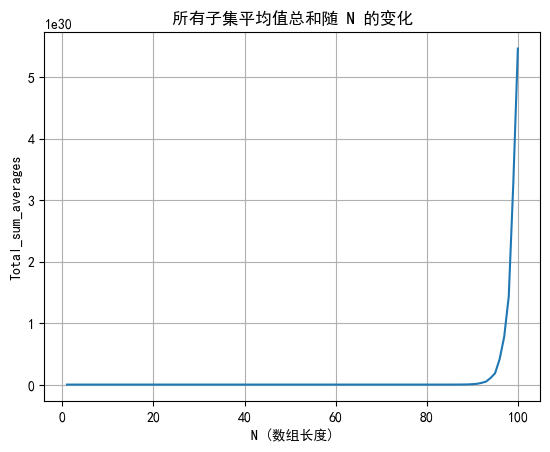

现象：随着 N 增大，结果增长非常快，接近指数级。


In [10]:
# homewor4
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimHei']  
rcParams['axes.unicode_minus'] = False     

# 4.1 
def Random_integer(N):
    arr = []
    for i in range(N):
        arr.append(random.randint(0, 10))  
    return arr

# 4.2 
def Sum_averages(arr):
    n = len(arr)
    if n == 0:
        return 0
    total = sum(arr)  
    # 公式：Sum = (sum(arr)) * (2^n - 1) / n
    return total * (2**n - 1) / n

# 4.3 
def main():
    Total_sum_averages = []  
    Ns = range(1, 101)       

    for N in Ns:
        arr = Random_integer(N)          
        result = Sum_averages(arr)       
        Total_sum_averages.append(result)

    plt.plot(Ns, Total_sum_averages)
    plt.xlabel("N (数组长度)")
    plt.ylabel("Total_sum_averages")
    plt.title("所有子集平均值总和随 N 的变化")
    plt.grid(True)
    plt.show()

    print("现象：随着 N 增大，结果增长非常快，接近指数级。")

if __name__ == "__main__":
    main()


In [26]:
# homework5
import random
import numpy as np

# 5.1 
def create_matrix(N, M):
    matrix = np.random.randint(0, 2, size=(N, M))  
    matrix[0][0] = 1
    matrix[N-1][M-1] = 1
    return matrix

# 5.2 ）
def Count_path(matrix):
    N, M = matrix.shape
    dp = [[0]*M for _ in range(N)]

    if matrix[0][0] == 1:
        dp[0][0] = 1

    for j in range(1, M):
        if matrix[0][j] == 1:
            dp[0][j] = dp[0][j-1]

    for i in range(1, N):
        if matrix[i][0] == 1:
            dp[i][0] = dp[i-1][0]

    for i in range(1, N):
        for j in range(1, M):
            if matrix[i][j] == 1:
                dp[i][j] = dp[i-1][j] + dp[i][j-1]

    return dp[N-1][M-1]

# 5.3 
def experiment(N=10, M=8, runs=1000):
    total_paths = 0
    for _ in range(runs):
        mat = create_matrix(N, M)
        total_paths += Count_path(mat)
    mean_paths = total_paths / runs
    return mean_paths

mean_paths = experiment(10, 8, 1000)
print("N=10, M=8, 运行1000次的平均路径数:", mean_paths)


N=10, M=8, 运行1000次的平均路径数: 0.224
